In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(2)

In [3]:
data = pd.read_csv(r"C:\Users\Ethan\OneDrive - Swinburne University\Side Projects\creditcard_fraud_dataset\creditcard.csv")
data

In [4]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'], axis=1)
data = data.drop(['Time'], axis=1)
y = data['Class']
x = data.drop(['Class'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(199364, 29) (85443, 29) (199364,) (85443,)


In [5]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [6]:
rf.score(x_test, y_test)

0.9995435553526912

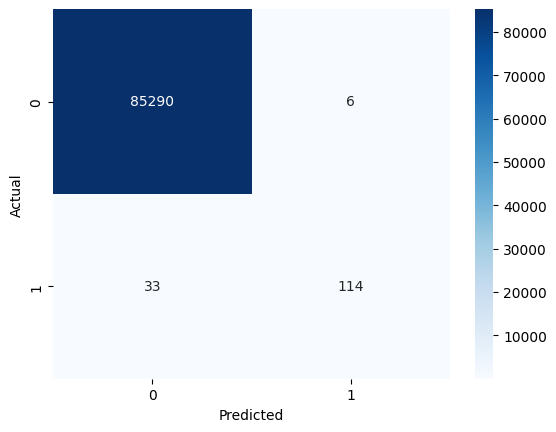

In [7]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

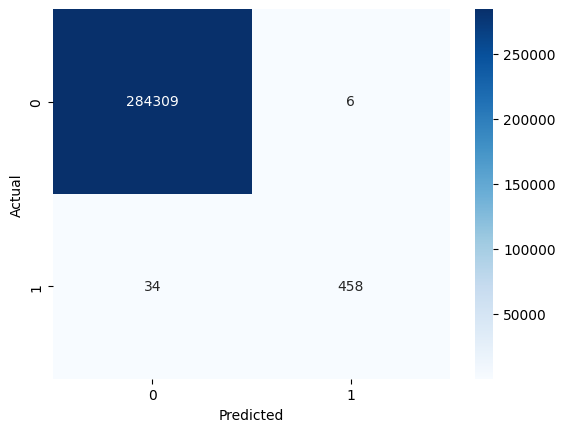

In [8]:
y_pred = rf.predict(x)
cnf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt.score(x_test, y_test)

0.9992392589211521

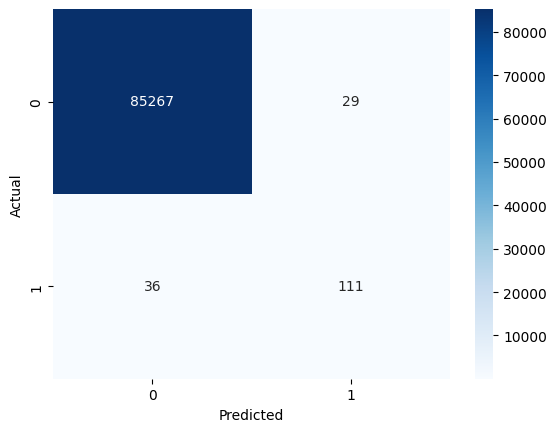

In [10]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

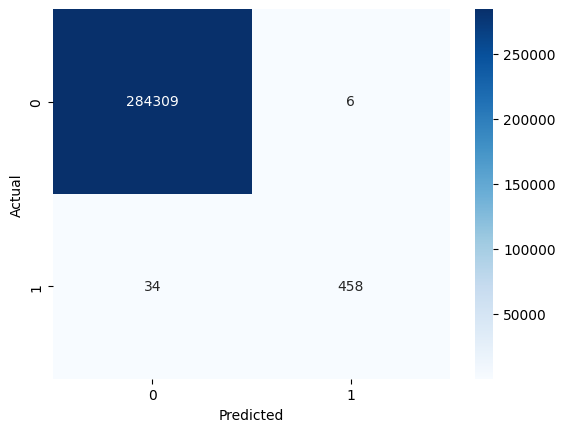

In [11]:
y_pred = rf.predict(x)
cnf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Under Sampling
fraud_indices = data[data.Class == 1].index
number_records_fraud = len(fraud_indices)

normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = data.iloc[under_sample_indices]

y_under = under_sample_data['Class']
x_under = under_sample_data.drop(['Class'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=0)